### lecture 12 - AR(p), Autoregressive Model

 In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

In [93]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg,ARResults
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [94]:
df = pd.read_csv('./dataset/uspopulation.csv',index_col='DATE',parse_dates=True)

In [95]:
df.index.freq = 'MS'

In [96]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<Axes: xlabel='DATE'>

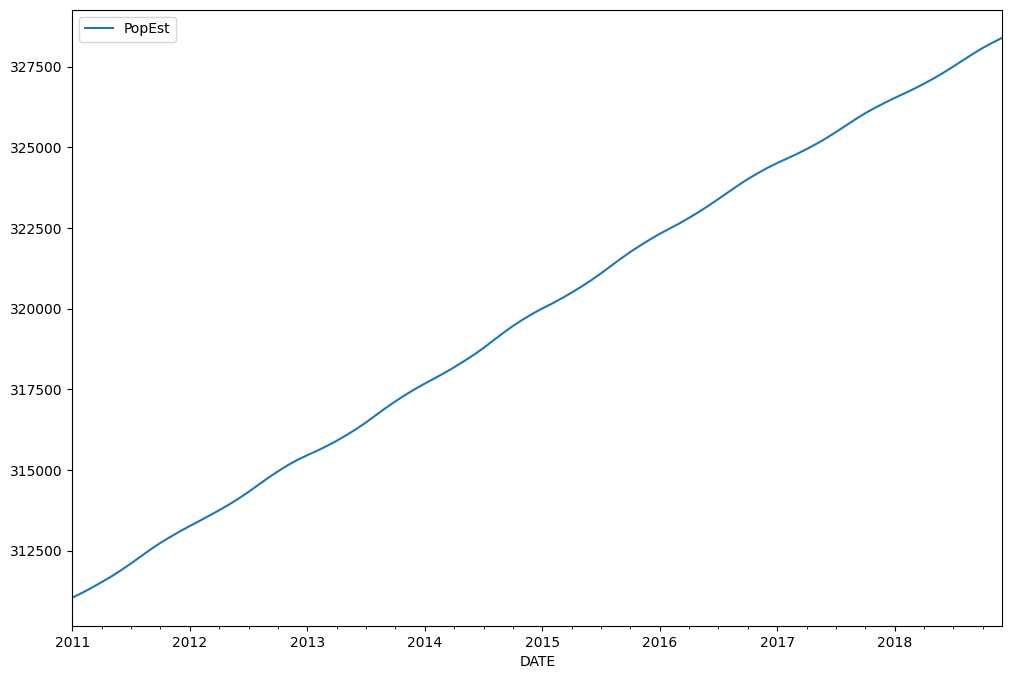

In [97]:
df.plot(figsize=(12,8))

#### split the data into train/test sets
The goal in this section is to:
* Split known data into a training set of records on which to fit the model
* Use the remaining records for testing, to evaluate the model
* Fit the model again on the <em>full</em> set of records
* Predict a future set of values using the model

As a general rule you should set the length of your test set equal to your intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

In [98]:
len(df)

96

In [99]:
train = df.iloc[:84]

In [100]:
test = df.iloc[84:]

#### AR(1) model

In [101]:
model = AutoReg(train['PopEst'],lags=1)

In [102]:
AR1fit = model.fit()

In [103]:
AR1fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [104]:
start = len(train)

In [105]:
end = len(train) + len(test) - 1

In [106]:
start

84

In [107]:
end

95

In [108]:
AR1fit.predict(start=start,end=end) # predictions

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [109]:
test # actual values

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


#### predictions evaluation

In [110]:
predictions1 = AR1fit.predict(start=start,end=end) 

In [111]:
predictions1 = predictions1.rename('AR(1) predictions')

In [112]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) predictions, dtype: float64

<Axes: xlabel='DATE'>

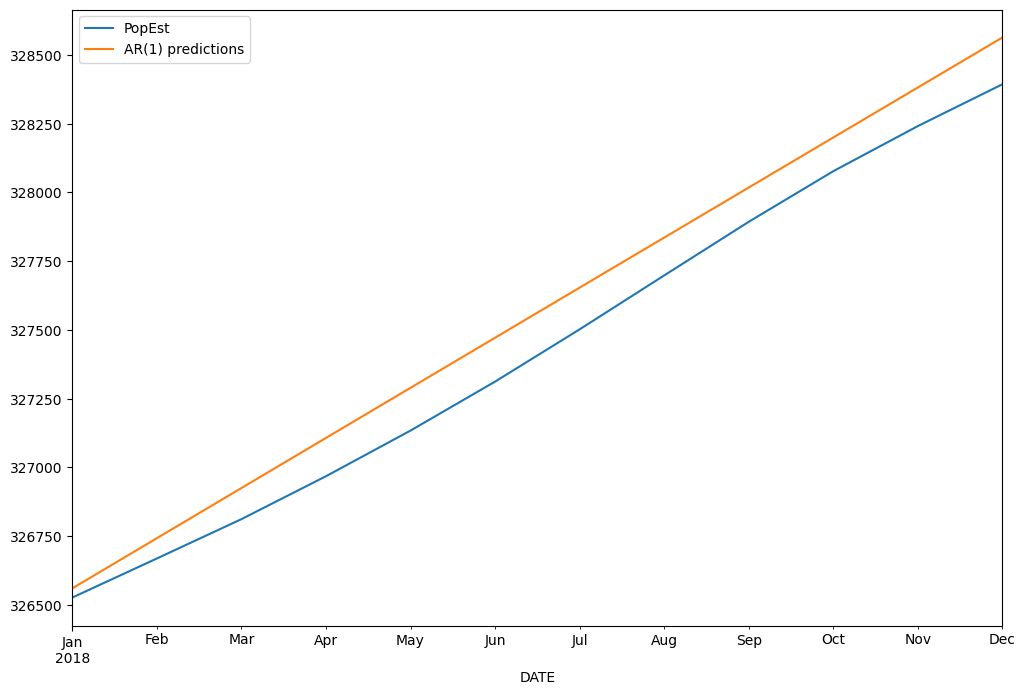

In [113]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)

quite bad predictions since we are over estimating the number of births

#### AR(2) model

In [114]:
model = AutoReg(train['PopEst'],lags=2)

In [115]:
AR2fit = model.fit()

In [116]:
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [117]:
predictions2 = AR2fit.predict(start,end)

In [118]:
predictions2 = predictions2.rename('AR(2) predictions')

<Axes: xlabel='DATE'>

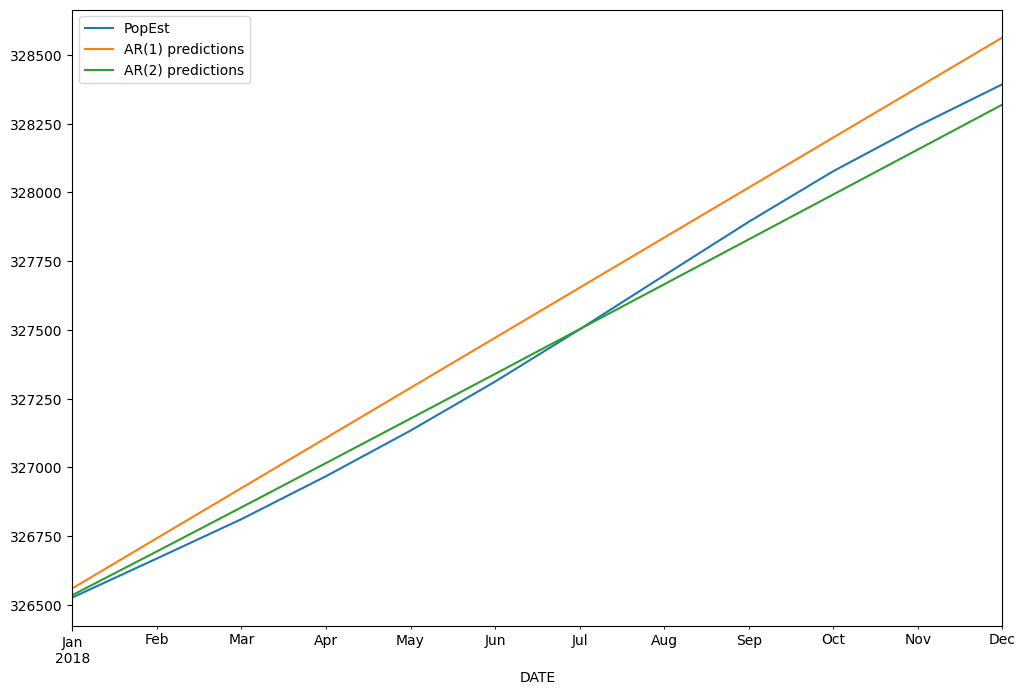

In [119]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

with AR order 2 we are getting closer to the test values 

In [120]:
model = AutoReg(train['PopEst'],lags=8)

In [125]:
AR8fit = model.fit()

In [126]:
AR8fit.params

const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64

In [128]:
predictions8 = AR8fit.predict(start,end)

In [129]:
predictions8 = predictions8.rename('AR(8) predictions')

In [127]:
labels = ['AR1','AR2','AR8']

In [131]:
preds = [predictions1,predictions2,predictions8]

In [135]:
for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f"{labels[i]} MSE was: {error}")

AR1 MSE was: 17449.71423587912
AR2 MSE was: 2713.258667805521
AR8 MSE was: 186.972186531862


#### plots

<Axes: xlabel='DATE'>

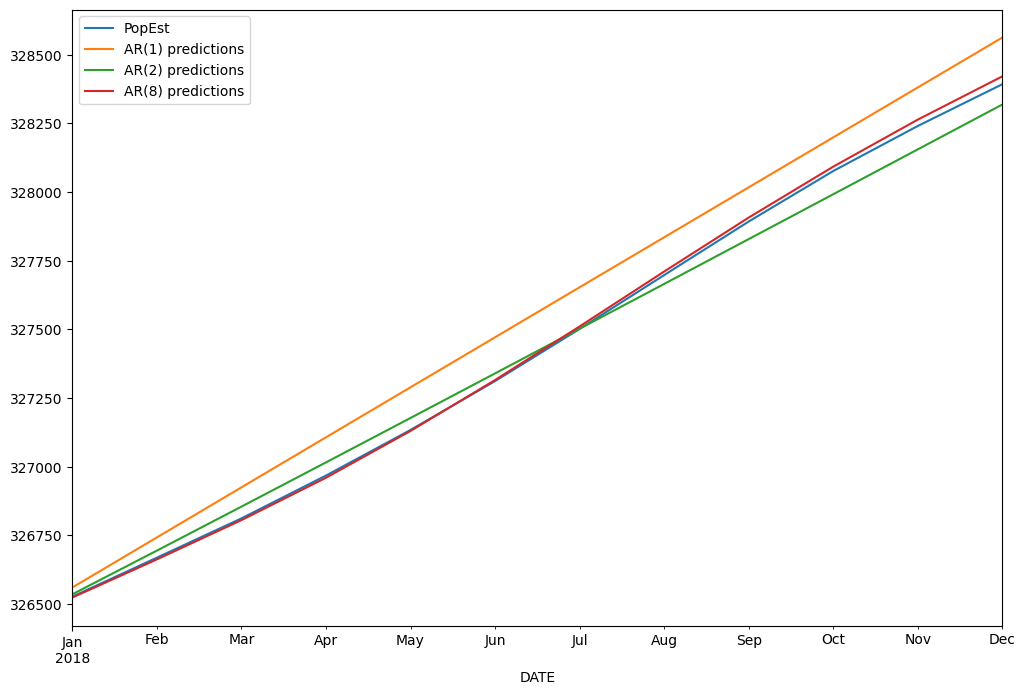

In [136]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

it can be seen that the predictions given by the AR(8) model are almost identical to the true values of the test set

#### forecasting

In [137]:
model = AutoReg(df['PopEst'],lags=8)

In [139]:
ARfit = model.fit()

In [141]:
forecasted_values = ARfit.predict(start=len(df),end=len(df)+12).rename('forecast')

<Axes: xlabel='DATE'>

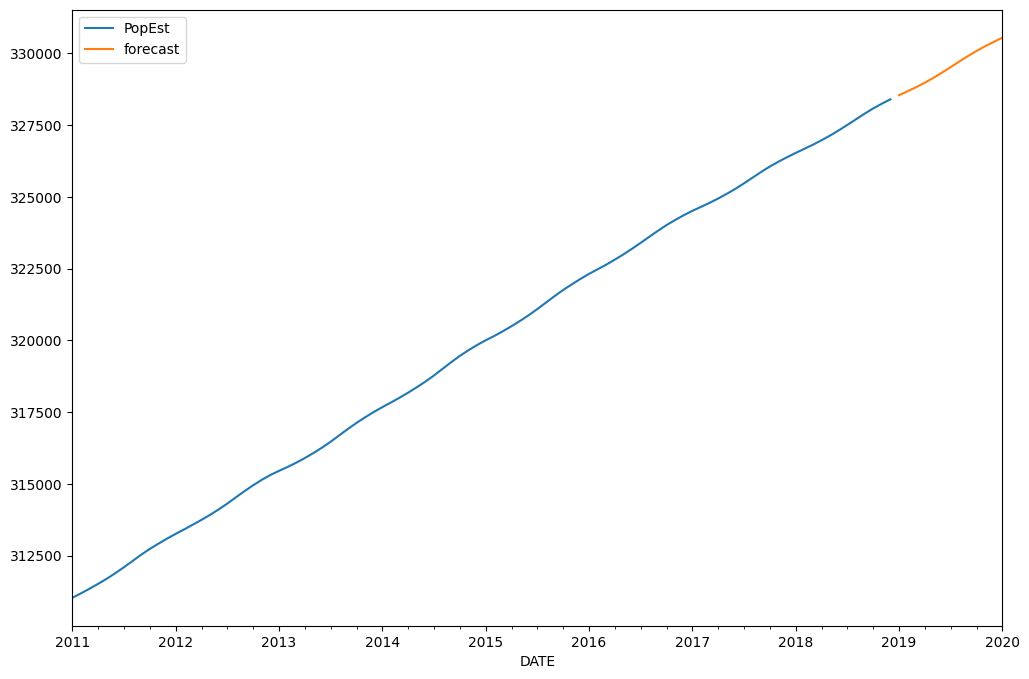

In [ ]:
df['PopEst'].plot(figsize=(12,8),legend=True)
forecasted_values.plot(legend=True) # orange